# **Marketing Analysis**

# **1. Import Libraries**

In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import missingno
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

rcParams['figure.figsize'] = (10,6)
sns.set_theme(style='whitegrid')
sns.set_palette('Spectral')

import plotly.express as px
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import OrdinalEncoder


# **2. Getting familiar with data**

### 2.1 Import Data

In [2]:
df = pd.read_csv("./input/marketing_data.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [3]:
print("Number of columns in the dataset: %s" %(df.shape[1]))
print("Number of rows in the dataset: %s"%(df.shape[0]))

Number of columns in the dataset: 28
Number of rows in the dataset: 2240


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

### 2.2 Initial olumn details 

**ID**: Customer's Unique Identifier

**Year_Birth**: Customer's Birth Year

**Education**: Customer's education level

**Marital_Status**: Customer's marital status

**Income**: Customer's yearly household income

**Kidhome**: Number of children in customer's household

**Teenhome**: Number of teenagers in customer's household

**Dt_Customer**: Date of customer's enrollment with the company

**Recency**: Number of days since customer's last purchase

**MntWines**: Amount spent on wine in the last 2 years

**MntFruits**: Amount spent on fruits in the last 2 years

**MntMeatProducts**: Amount spent on meat in the last 2 years

**MntFishProducts**: Amount spent on fish in the last 2 years

**MntSweetProducts**: Amount spent on sweets in the last 2 years

**MntGoldProds**: Amount spent on gold in the last 2 years

**NumDealsPurchases**: Number of purchases made with a discount

**NumWebPurchases**: Number of purchases made through the company's web site

**NumCatalogPurchases**: Number of purchases made using a catalogue

**NumStorePurchases**: Number of purchases made directly in stores

**NumWebVisitsMonth**: Number of visits to company's web site in the last month

**AcceptedCmp1**: 1 if customer accepted the offer in the 1st campaign, 0 otherwise (Target variable)

**AcceptedCmp2**: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise (Target variable)

**AcceptedCmp3**: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise (Target variable)

**AcceptedCmp4**: 1 if customer accepted the offer in the 4th campaign, 0 otherwise (Target variable)

**AcceptedCmp5**: 1 if customer accepted the offer in the 5th campaign, 0 otherwise (Target variable)

**Response**: 1 if customer accepted the offer in the last campaign, 0 otherwise (Target variable)

**Complain**: 1 if customer complained in the last 2 years, 0 otherwise

**Country**: Customer's location

# __3. Exploratory Data Analysis__


### 3.1 Check and handle null values

features,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
total_missing,0.0,0.0,0.0,0.0,24.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
percent,0.0,0.0,0.0,0.0,1.071429,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


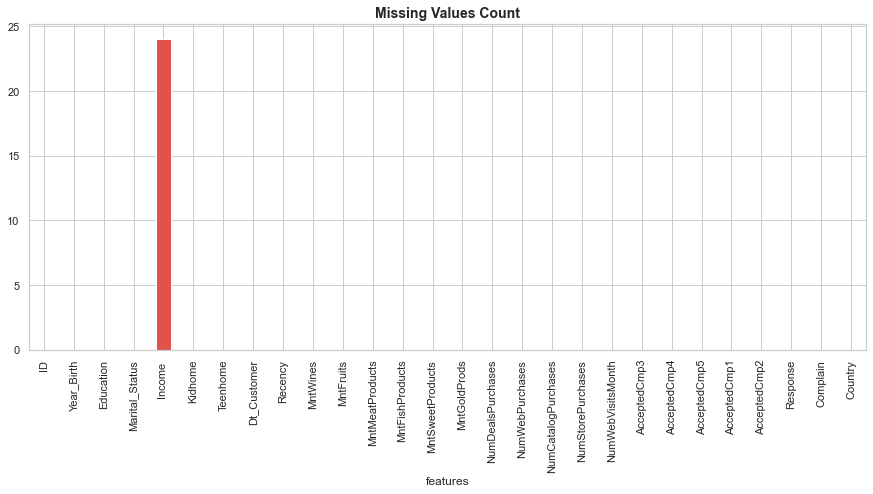

In [5]:
# Visualize the general missing values of data
plt.figure(figsize=(15,6))
missing = df.isna().sum().reset_index() # call out 2 columns ['Name of the column','total na value']
missing.columns = ['features', 'total_missing'] # replace columns name with ['features', 'total_missing']
missing['percent'] = (missing['total_missing'] / len(df)) * 100 # create percent column 
missing.index = missing['features'] # replace index with features column
del missing['features'] # delete features column

missing['total_missing'].plot(kind = 'bar') # plot bar chart of total missing values
plt.title('Missing Values Count',fontweight='bold',fontsize = 14) # customize title of the bar chart
missing.T

In [6]:
missingvalue = df[" Income "].isnull().sum()
print("There are %d missing values in column Income." %missingvalue)

There are 24 missing values in column Income.


There are also some problems with Income column:
- Missing values: We will create a dataframe of missing values for further solution. 

- Unexpected spaces in the title: might be confusing so we have to rename it.

- Datatype of object: we need to convert it to float for further calculation.

In [7]:
df.rename(columns = {' Income ': 'Income'},inplace = True)

# Convert datatype of Income column from object to float.
df["Income"] = df["Income"].str.replace("$","",regex=True).str.replace(",","",regex=True)
df["Income"] = df["Income"].astype(float)

In [8]:
# Create a copy dataframe of missing values
df_missing = df[df.isna().any(axis=1)] 
df_missing

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
134,8996,1957,PhD,Married,NaN,2,1,11/19/12,4,230,...,8,9,0,0,0,0,0,0,0,GER
262,1994,1983,Graduation,Married,NaN,1,0,11/15/13,11,5,...,2,7,0,0,0,0,0,0,0,US
394,3769,1972,PhD,Together,NaN,1,0,3/2/14,17,25,...,3,7,0,0,0,0,0,0,0,AUS
449,5255,1986,Graduation,Single,NaN,1,0,2/20/13,19,5,...,0,1,0,0,0,0,0,0,0,AUS
525,8268,1961,PhD,Married,NaN,0,1,7/11/13,23,352,...,7,6,0,0,0,0,0,0,0,CA
590,10629,1973,2n Cycle,Married,NaN,1,0,9/14/12,25,25,...,3,8,0,0,0,0,0,0,0,GER
899,10475,1970,Master,Together,NaN,0,1,4/1/13,39,187,...,6,5,0,0,0,0,0,0,0,US
997,9235,1957,Graduation,Single,NaN,1,1,5/27/14,45,7,...,2,7,0,0,0,0,0,0,0,GER
1096,4345,1964,2n Cycle,Single,NaN,1,1,1/12/14,49,5,...,2,7,0,0,0,0,0,0,0,AUS
1185,7187,1969,Master,Together,NaN,1,1,5/18/13,52,375,...,4,3,0,0,0,0,0,0,0,AUS


It is understanable that some people didn't want to inform their salary and there is no problem with the remaining columns so we can impute these null value.

There are several imputation we can process on the missing values, for example:
- Filling the missing data with the mean or median value if it’s a numerical variable.
- Filling the missing data with mode if it’s a categorical value.
- Filling the numerical value with 0 or -999, or some other number that will not occur in the data. This can be done so that the machine can recognize that the data is not real or is different.
- Filling the categorical value with a new type for the missing values.

Income is a numberical variable so we could choose to fill with the mean or median value **or** we could choose to use Regression model to handle the missing values. We will choose to fill missing values with the linear regression model by using interpolate function.

In [9]:
df["Income"].interpolate(method="linear",inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### 3.2 Check and handle outliers

In [10]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52193.481027,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25083.894953,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51301.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68325.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Genuinely, this table provides particularly useful general information for our preliminary investigation focusing on Age, Income and Spending:

The mean of **Year_Birth** is around 1970. The gap between the minimum and the maximum of the year is more than 100 years. And the minimum year_birth as 1893 can be considered as an outlier.

Average **Income** is $55,247 but we can see an interesting information which is the maximum value of Income of $666,666. This value beyonds the 75% distribution 10 times so it is highly expected to be an outlier. 



In [11]:
df_copy = df.drop(columns =['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain','Country'])
df_box = df_copy

fig = px.box(df_box.melt(), y="value", facet_col="variable", facet_col_wrap=4, boxmode="overlay", color="variable",height=1600, width=900,)
fig.update_yaxes(matches=None)

for i in range(len(fig["data"])):
    yaxis_name = 'yaxis' if i == 0 else f'yaxis{i + 1}'
    fig.layout[yaxis_name].showticklabels = True

fig.update_layout(showlegend=False)
fig.update_xaxes(showline=True, linewidth=2, linecolor='grey')
fig.update_yaxes(showline=True, linewidth=2, linecolor='grey')

fig.show()

- **Year_Birth**: There are 3 datapoints beyond the lower fence. We will not remove them since we want to keep the older customer. 

- **Income**: Several values are greater than the Upper Fence of $113K. While having an income of 150k is not impossible, we will remove the customer who has an income of 666k since this increases the variability in our data, which decrease statistical power.

- Other outliers could be considered as inherent to the data.

In [12]:
# Remove outlier
df = df.drop(df[df["Income"]>600000].index).reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2239 entries, 0 to 2238
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2239 non-null   int64  
 1   Year_Birth           2239 non-null   int64  
 2   Education            2239 non-null   object 
 3   Marital_Status       2239 non-null   object 
 4   Income               2239 non-null   float64
 5   Kidhome              2239 non-null   int64  
 6   Teenhome             2239 non-null   int64  
 7   Dt_Customer          2239 non-null   object 
 8   Recency              2239 non-null   int64  
 9   MntWines             2239 non-null   int64  
 10  MntFruits            2239 non-null   int64  
 11  MntMeatProducts      2239 non-null   int64  
 12  MntFishProducts      2239 non-null   int64  
 13  MntSweetProducts     2239 non-null   int64  
 14  MntGoldProds         2239 non-null   int64  
 15  NumDealsPurchases    2239 non-null   i

### 3.3 Data Transformation

We can create 4 new variables including: 

1. __Age__: calculating the age of customers in replacement of the variable Year_Birth
2. __Child__: combining 2 column "Kidhome" and "Teenhome" into a column "Child"
3. __Spending__: calculating the sum of 6 products as the amount of customer's spending 
4. __Num_Total_Purchases__: adding all the purchases features

In [13]:
df["Age"] = 2021 - df["Year_Birth"]

df["Child"] = df["Kidhome"] + df["Teenhome"]

spending_feature = [c for c in df.columns if 'Mnt' in str(c)]
df["Spending"] = df[spending_feature].sum(axis=1)

purchases_feature = [c for c in df.columns if 'Purchases' in str(c)]
df["Num_Total_Purchases"] = df[purchases_feature].sum(axis=1)

# After creating new variables, we also drop some columns to avoid duplication
df.drop(columns=['Year_Birth','Dt_Customer','Response','Complain','Kidhome','Teenhome'],inplace= True)
df.describe()

,ID,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Age,Child,Spending,Num_Total_Purchases
count,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,...,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000,2239.000000
mean,5590.444841,51919.040420,49.121036,304.067441,26.307727,167.016525,37.538633,27.074587,44.036177,2.324252,...,5.316213,0.072800,0.074587,0.072800,0.064314,0.013399,52.197856,0.950424,606.041090,14.863778
std,3246.372471,21463.830437,28.963662,336.614830,39.781468,225.743829,54.637617,41.286043,52.174700,1.932345,...,2.427144,0.259867,0.262782,0.259867,0.245367,0.115001,11.985494,0.751970,602.274089,7.678453
min,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,5.000000,0.000000
25%,2827.500000,35284.000000,24.000000,24.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,69.000000,8.000000
50%,5455.000000,51287.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,51.000000,1.000000,396.000000,15.000000
75%,8423.500000,68298.500000,74.000000,504.500000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,62.000000,1.000000,1046.000000,21.000000
max,11191.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,128.000000,3.000000,2525.000000,44.000000


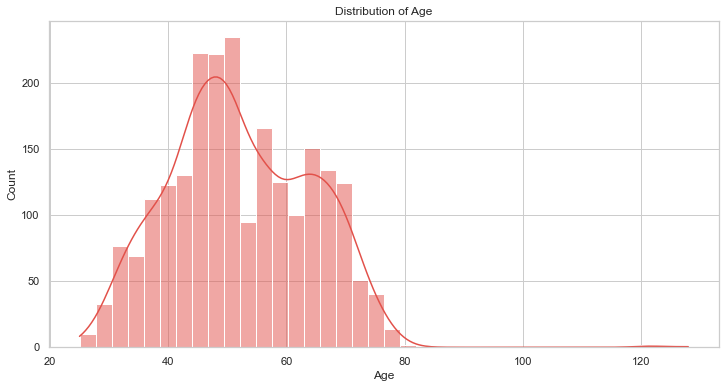

In [14]:
plt.figure(figsize=(12,6))
sns.histplot(data=df['Age'],kde=True)
plt.title('Distribution of Age')
plt.show()

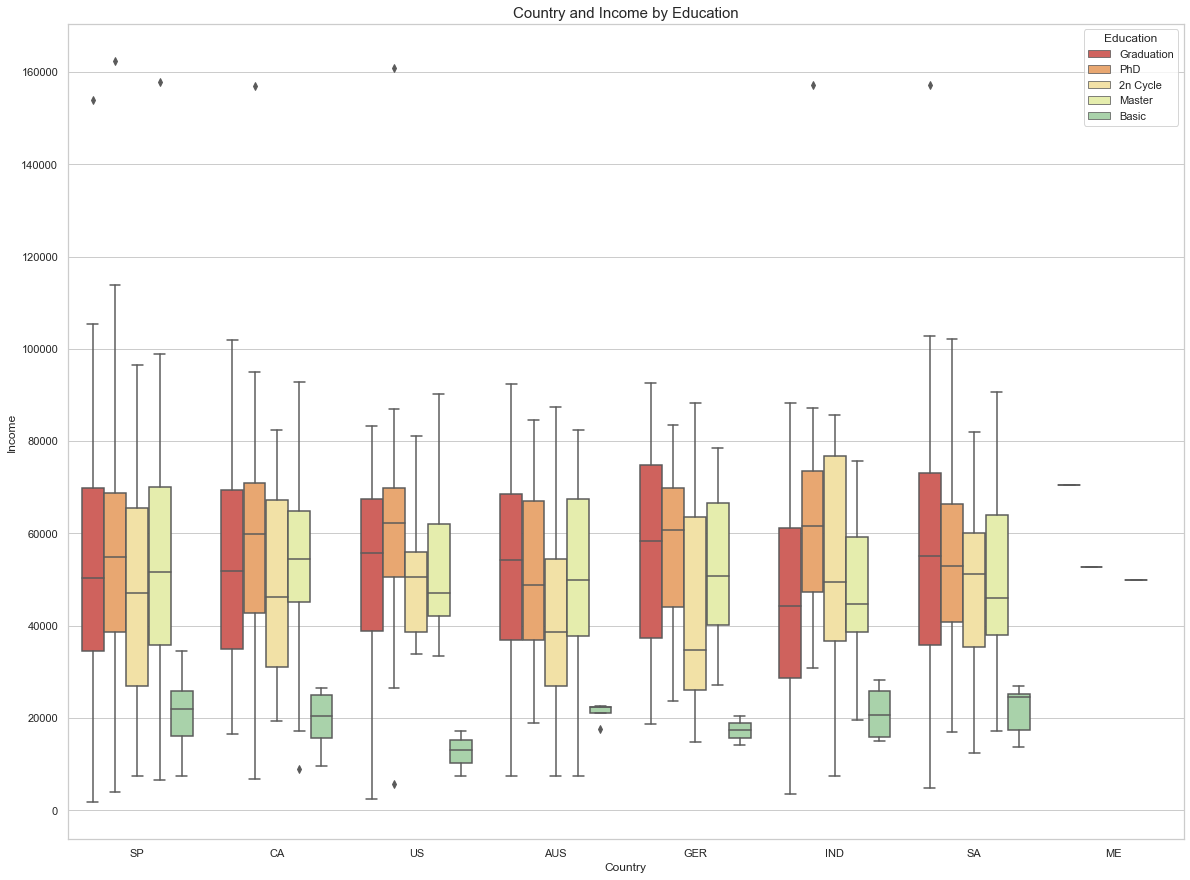

In [15]:
# Plot a boxplot of Country and Customer Age Per Education 
plt.figure(figsize = (20,15))
sns.boxplot(data=df,x='Country',y='Income',hue='Education')
plt.title('Country and Income by Education',fontsize = 15)
plt.show()

- From the Boxplot above, we can see that Basic is the group having the lowest income since this group's education is between Primary and Secondary school levels.
- The 2nd Cycle Group's Income is mostly lower than Graduation and PhD group except for India (IND). We can assume that '2nd Cycle' as someone who hasn't completed their undergraduate or in the process completing it. 
- Income of Mexico (ME) does not provide much information, we will consider eliminate ME from the dataset.

Also, we can transform the group of **'Yolo', 'Alone', 'Absurb'** to **'Single'**

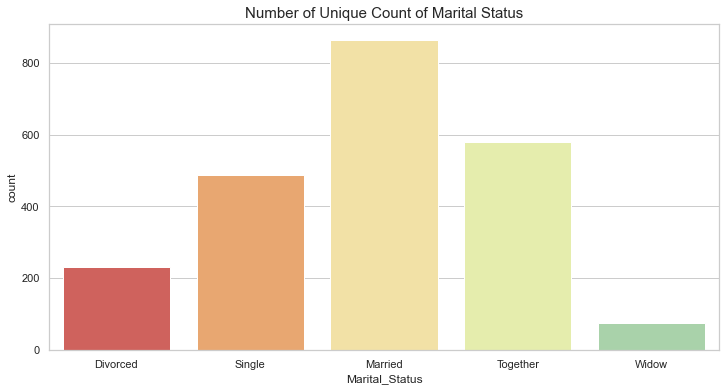

In [16]:
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: "Single" if str(x) in ['YOLO','Absurd','Alone'] else str(x))

# Plot a countplot for marital status
plt.figure(figsize=(12,6))
sns.countplot(data=df,x='Marital_Status')
plt.title('Number of Unique Count of Marital Status',fontsize = 15)
plt.show()

### 3.4 Categorical Encoding

In [17]:
df_enc = df.copy()

In [18]:
encode_feature = ['Education','Marital_Status','Country']
print(f'Features that need to be encoded: \n{encode_feature}')
for c in encode_feature:
    encoder = OrdinalEncoder()
    df_enc[c] = encoder.fit_transform(df_enc[[c]])

categorical_feature = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']
categorical_feature.extend(encode_feature)
numerical_features = [c for c in df_enc.columns if c not in categorical_feature]
print(f'Number of categorical features: {len(categorical_feature)}')
print(f'Number of numerical features: {len(numerical_features)}') 

Features that need to be encoded: 
['Education', 'Marital_Status', 'Country']
Number of categorical features: 8
Number of numerical features: 18


In [19]:
df_enc.columns

Index(['ID', 'Education', 'Marital_Status', 'Income', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Country', 'Age', 'Child', 'Spending',
       'Num_Total_Purchases'],
      dtype='object')

In [42]:
df.to_csv('data_cleaned.csv',index = False)

# __4. Statistical Analysis__ 

### 4.1 What factors are significantly related to the number of store purchases?

In [20]:
df.corr()[['Num_Total_Purchases']].style.background_gradient(axis = 0, cmap = 'RdBu')

,Num_Total_Purchases
ID,-0.023577
Income,0.665332
Recency,0.005539
MntWines,0.712755
MntFruits,0.455427
MntMeatProducts,0.554166
MntFishProducts,0.469390
MntSweetProducts,0.472803
MntGoldProds,0.493246
NumDealsPurchases,0.362611


- As parts of the Num_Total_Purchases, number of web, catalogs, store purchases have positive effect.
- Income and Spending amount are the most noticeably significant factors that decides number of total purchases.
- There are 2 variables showing negative correlation to the number of total purchases which are number of child in the family and number of monthly web visists.

In [21]:
quantitative = [f for f in df.columns if df.dtypes[f]!= 'object']
quantitative.remove('Num_Total_Purchases')
qualitative = [f for f in df.columns if df.dtypes[f] == 'object']

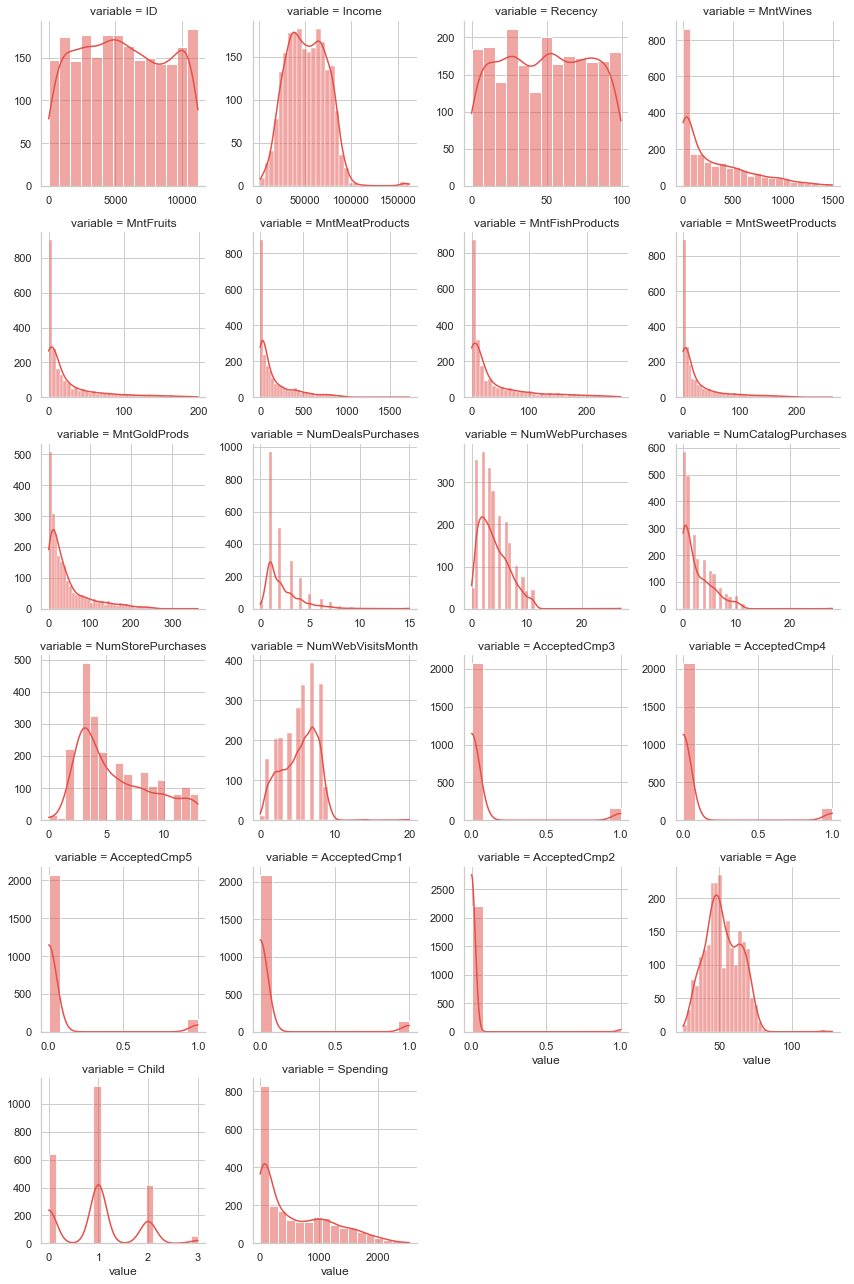

In [22]:
f = pd.melt(df, value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(sns.histplot, 'value',kde=True)

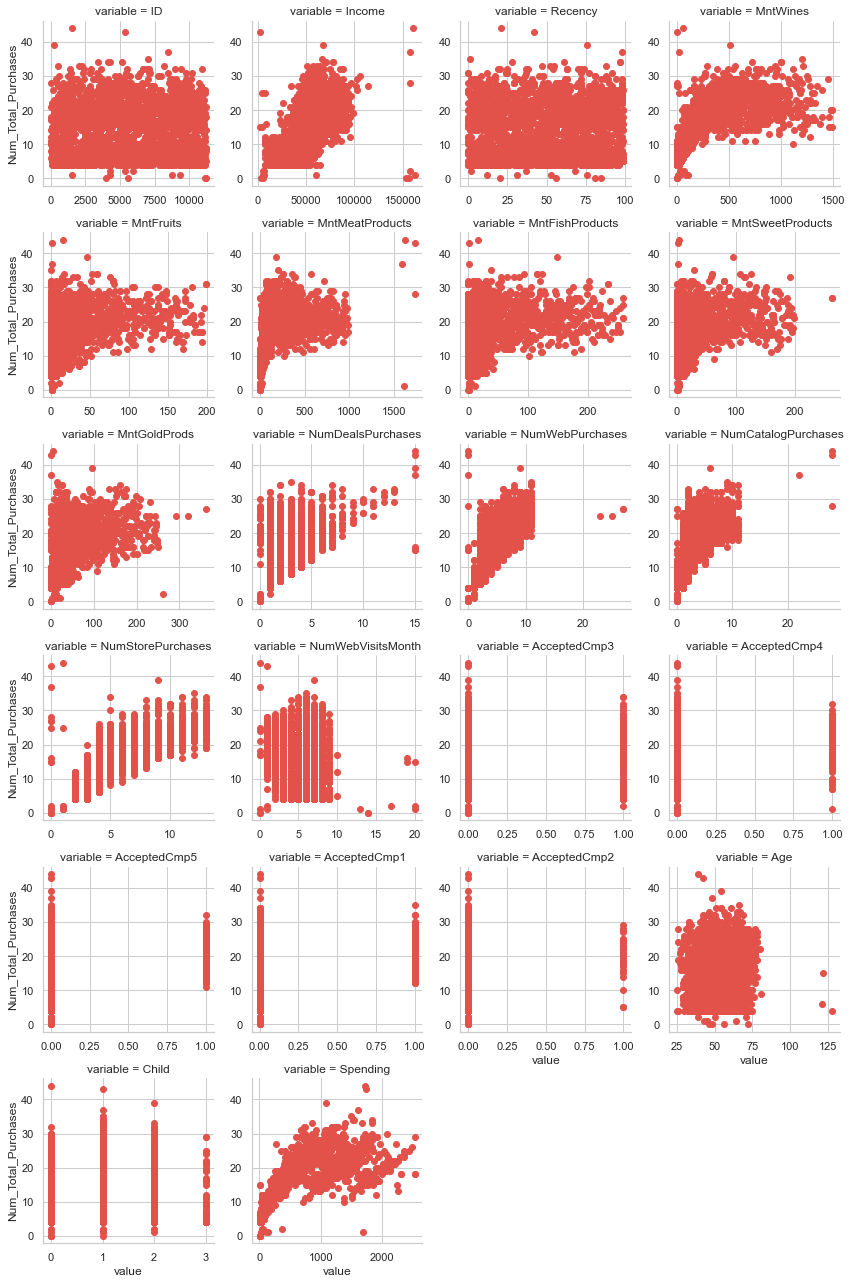

In [23]:
f = pd.melt(df, id_vars=['Num_Total_Purchases'], value_vars=quantitative)
grid = sns.FacetGrid(f, col='variable',  col_wrap=4, sharex=False, sharey=False)
grid = grid.map(plt.scatter, 'value', 'Num_Total_Purchases')

<Figure size 720x720 with 0 Axes>

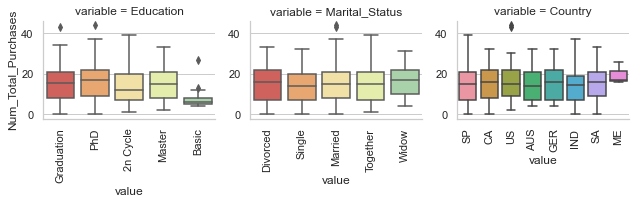

In [24]:
def boxplot(x, y, **kwargs):
  sns.boxplot(x=x, y=y)
  x=plt.xticks(rotation=90)
plt.figure(figsize=(10,10))
f = pd.melt(df, id_vars=['Num_Total_Purchases'], value_vars=qualitative)
g = sns.FacetGrid(f, col='variable',  col_wrap=3, sharex=False, sharey=False)
g = g.map(boxplot, 'value', 'Num_Total_Purchases')

In [25]:
feature = df_enc.drop(['ID','Num_Total_Purchases'],axis=1)
target = df_enc['Num_Total_Purchases']

Xtrain, Xvalid, Ytrain, Yvalid = train_test_split(feature,target,test_size=0.2,random_state=42)
print(Xtrain.shape, Ytrain.shape, Xvalid.shape, Yvalid.shape)

(1791, 24) (1791,) (448, 24) (448,)


<AxesSubplot:ylabel='Count'>

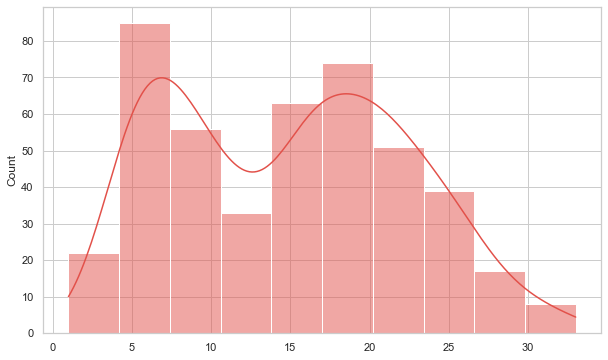

In [26]:
# We will conduct a regression model to predict the total number of purchases and have some further analysis
lin_reg = LinearRegression()

lin_reg.fit(Xtrain,Ytrain)
predictions = lin_reg.predict(Xvalid)

sns.histplot(predictions,kde=True)

In [27]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lin_reg, random_state = 42).fit(Xvalid, Yvalid)
eli5.show_weights(perm, feature_names = Xvalid.columns.tolist(), top = 10)

Weight,Feature
0.3706 ± 0.0293,NumStorePurchases
0.2953 ± 0.0174,NumWebPurchases
0.2608 ± 0.0201,NumCatalogPurchases
0.1218 ± 0.0077,NumDealsPurchases
0 ± 0.0000,MntFruits
0 ± 0.0000,MntMeatProducts
0 ± 0.0000,Recency
0 ± 0.0000,MntFishProducts
0 ± 0.0000,MntGoldProds
0 ± 0.0000,MntWines


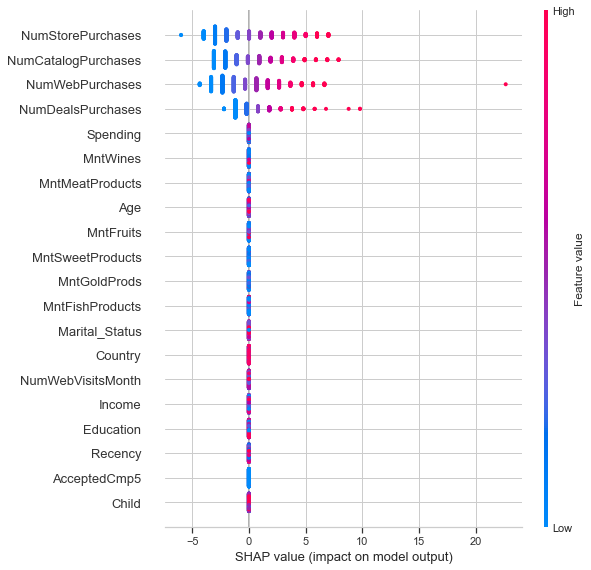

In [28]:
import shap

explainer = shap.Explainer(lin_reg, Xtrain)
shap_values = explainer(Xvalid)

#plotting
shap.summary_plot(shap_values, Xvalid)

In [29]:
df_cn = pd.pivot_table(data=df,index = 'Country',values = ['Num_Total_Purchases'],aggfunc=['sum','mean'])
df_cn.T

,Country,AUS,CA,GER,IND,ME,SA,SP,US
sum,Num_Total_Purchases,2314.0000,4101.000000,1788.0,2099.000000,59.000000,5106.000000,16052.000000,1761.000000
mean,Num_Total_Purchases,14.4625,15.302239,14.9,14.182432,19.666667,15.196429,14.659361,16.155963


In [30]:
f = df_cn['sum']['Num_Total_Purchases'].sort_values(ascending=False)
f.values
#fig, ax = plt.subplots(figsize=(10,6))
#ax.bar(f.index, f.values)
#ax.set(title= 'Total Number of Purchases by Country',
#        ylabel='Total Num Purchases')

array([16052,  5106,  4101,  2314,  2099,  1788,  1761,    59],
      dtype=int64)

- We can see from the above graph, Spain (SP) has the highest number of purchases and surpasses 8 times more than US fare which stands at the 7th place just right before Mexico.

### 4.2 Find relationship between Amount spent in gold products and Store Purchases

<AxesSubplot:xlabel='NumStorePurchases', ylabel='MntGoldProds'>

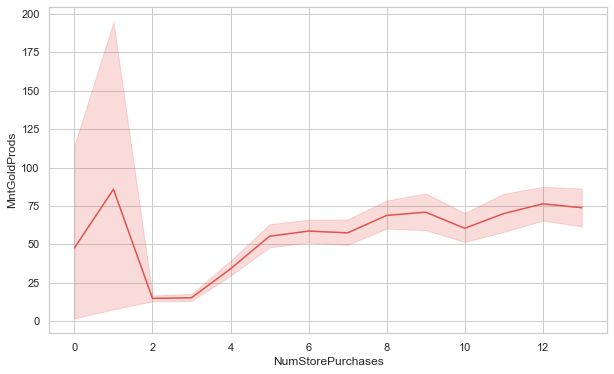

In [31]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,y = 'MntGoldProds',x = 'NumStorePurchases')

In [32]:
df[['MntGoldProds','NumStorePurchases']].corr()

,MntGoldProds,NumStorePurchases
MntGoldProds,1.000000,0.381538
NumStorePurchases,0.381538,1.000000


### 4.3 Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish?

<AxesSubplot:xlabel='MntFishProducts', ylabel='Count'>

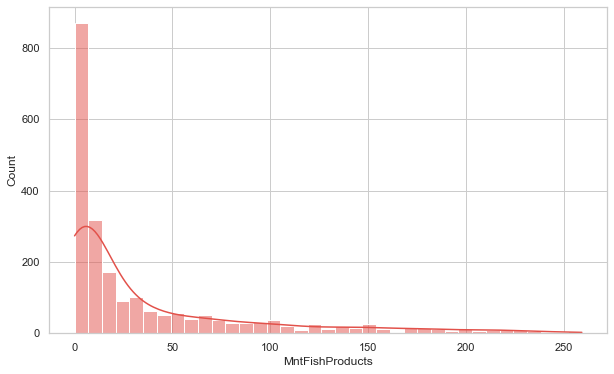

In [33]:
sns.histplot(data=df['MntFishProducts'],kde=True)

In [34]:
df_fish = pd.pivot_table(data= df,index = ['Marital_Status','Education'],values = ['MntFishProducts'],aggfunc='sum')
df_fish.T

Marital_Status  Divorced                                Married        \
Education       2n Cycle Basic Graduation Master   PhD 2n Cycle Basic   
MntFishProducts      764    10       4472   1090  1794     3370   559   

Marital_Status                           ... Together                          \
Education       Graduation Master   PhD  ... 2n Cycle Basic Graduation Master   
MntFishProducts      17918   3535  5187  ...     3524   142      12962   3266   

Marital_Status           Widow                               
Education         PhD 2n Cycle Basic Graduation Master  PhD  
MntFishProducts  2713      518    34       1676    862  867  

[1 rows x 25 columns]

<AxesSubplot:title={'center':'Amount of Fish Product'}, ylabel='Marital_Status,Education'>

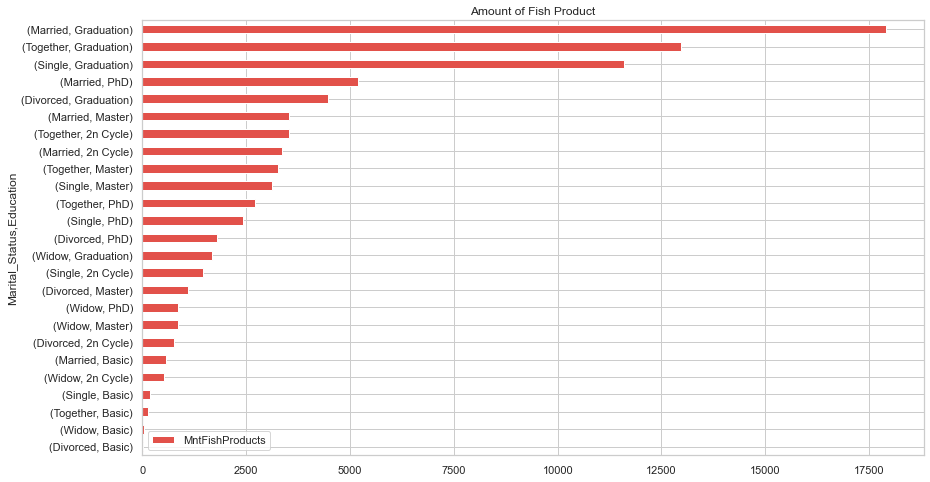

In [35]:
df_fish.sort_values(by = 'MntFishProducts',ascending = True).plot(kind='barh',figsize=(14,8),
                    title='Amount of Fish Product')


- Married - PhD can be seen as 4th place in the graph.
- Let's find what other factors affect the spending on Fish Prods.

In [36]:
df.corr()[['MntFishProducts']].style.background_gradient(axis = 0, cmap = 'RdBu')

,MntFishProducts
ID,-0.024198
Income,0.518059
Recency,0.000861
MntWines,0.399636
MntFruits,0.594780
MntMeatProducts,0.568335
MntFishProducts,1.000000
MntSweetProducts,0.579807
MntGoldProds,0.422790
NumDealsPurchases,-0.139184


In [37]:
features = df.drop(['ID', 'MntFishProducts','Education','Marital_Status','Country'], axis = 1)
target = df['MntFishProducts'].copy()

Xtrain, Xvalid, ytrain, yvalid = train_test_split(features, target, 
                                                  test_size = 0.2, random_state = 42)
print(Xtrain.shape, ytrain.shape, Xvalid.shape, yvalid.shape)

lin_reg = LinearRegression()

lin_reg.fit(Xtrain, ytrain)
predictions = lin_reg.predict(Xvalid)

(1791, 21) (1791,) (448, 21) (448,)


<AxesSubplot:ylabel='Count'>

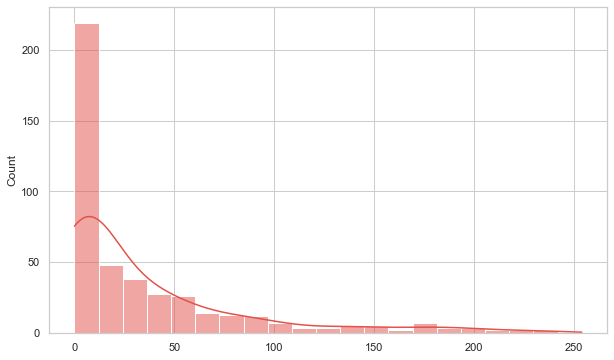

In [38]:
plt.figure(figsize=(10,6))
sns.histplot(predictions,kde=True)

In [39]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(lin_reg, random_state = 42).fit(Xvalid, yvalid)
perm
#eli5.show_weights(perm, feature_names = Xvalid.columns.tolist(), top = 10)

PermutationImportance(estimator=LinearRegression(), random_state=42)

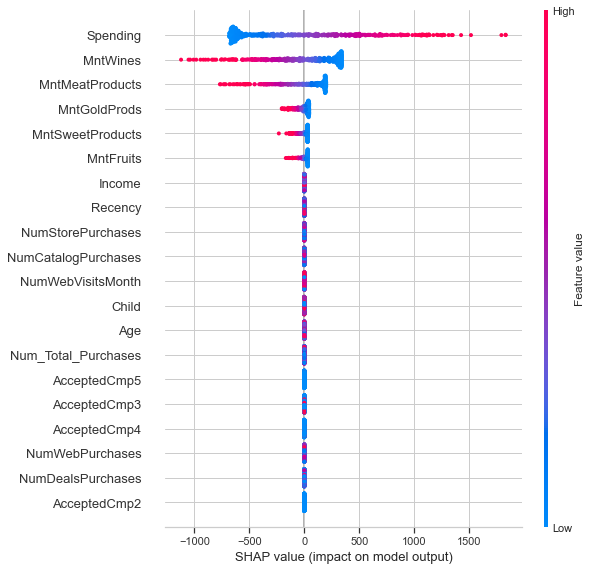

In [40]:
import shap

explainer = shap.Explainer(lin_reg, Xtrain)
shap_values = explainer(Xvalid)

#plotting
shap.summary_plot(shap_values, Xvalid)